# VGG-16 basic implementation
It is just for practice purpose. Implemented on cats and dogs images. Will update it later. Just basic implementation.

In [29]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import pickle
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data_directory=r"C:\Users\my pc\Desktop\Computer Vision practice\dataset"
train_data_dir=os.path.join(data_directory,'train')
test_data_dir=os.path.join(data_directory,'test')

In [3]:
img_size=224
categories=[]
for i in os.listdir(train_data_dir):
    categories.append(i)
print(categories)

['cats', 'dogs']


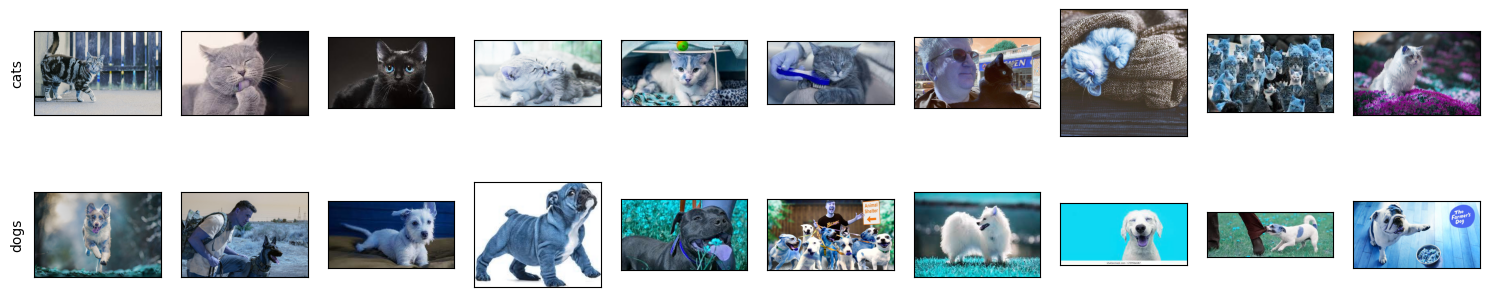

In [5]:
plt.figure(figsize=(15,4))
i=0
for c in categories:
    path=os.path.join(train_data_dir,c)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10==0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i+=1
        if i%10==0:
            break
plt.tight_layout()
plt.show()

In [7]:
training_data=[]
for c in categories:
    path=os.path.join(train_data_dir,c)
    class_num=categories.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            img_resized=cv2.resize(img_array,(img_size,img_size))
            training_data.append([img_resized,class_num])
        except Exception as e:
            pass
print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████| 278/278 [00:01<00:00, 181.11it/s]

557


In [8]:
test_data=[]
for c in categories:
    path=os.path.join(test_data_dir,c)
    class_num=categories.index(c)
    for img in tqdm(os.listdir(path)):
        try:
            img_array=cv2.imread(os.path.join(path,img))
            img_resized=cv2.resize(img_array,(img_size,img_size))
            test_data.append([img_resized,class_num])
        except Exception as e:
            pass
print(len(test_data))

100%|█████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 172.84it/s]

140


In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16

F:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
X = np.array([item[0] for item in training_data])
y = np.array([item[1] for item in training_data])

In [11]:
X = X / 255.0 

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = keras.Sequential()

#Block 1
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

#Block 2
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

#Block 3
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

#Block 4
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

#Block 5
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2)))

#Flatten and fully connected layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dense(4096, activation='relu'))
model.add(keras.layers.Dense(len(categories), activation='softmax'))  

#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model
model.fit(X, y, epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
14/14 [==============================] - 187s 13s/step - loss: 1.6870 - accuracy: 0.5910 - val_loss: 1.9297 - val_accuracy: 0.0000e+00
Epoch 2/5
14/14 [==============================] - 183s 13s/step - loss: 0.6864 - accuracy: 0.6270 - val_loss: 0.8676 - val_accuracy: 0.0000e+00
Epoch 3/5
14/14 [==============================] - 183s 13s/step - loss: 0.6671 - accuracy: 0.6270 - val_loss: 0.9798 - val_accuracy: 0.0000e+00
Epoch 4/5
14/14 [==============================] - 176s 13s/step - loss: 0.6620 - accuracy: 0.6270 - val_loss: 0.9691 - val_accuracy: 0.0000e+00
Epoch 5/5
14/14 [==============================] - 183s 13s/step - loss: 0.6637 - accuracy: 0.6270 - val_loss: 0.9653 - val_accuracy: 0.0000e+00
